In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Load data (Mnist)

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

### training data
28 * 28 pixel 값을 가진 총 60000개의 이미지

In [3]:
x_train.shape

(60000, 28, 28)

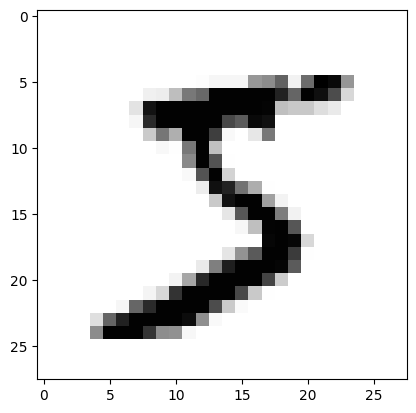

In [4]:
plt.imshow(x_train[0]).set_cmap('Greys')

In [5]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

### training labels
0-9까지의 값을 가진 60000개의 label존재

In [6]:
y_train.shape

(60000,)

In [7]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [8]:
y_train[0]

5

### MLP

Neural network 모델에 맞게 이미지 데이터를 벡터 형태로 데이터를 reshape 합니다.  
(Model을 만들 때 *keras.layers.Flatten(input_shape=(28, 28)) 이용해도 됨)

In [9]:
x_train, x_test = x_train.reshape((-1, 28*28)), x_test.reshape((-1, 28*28))
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [10]:
from keras.utils import to_categorical

#if 0으로 된 len 10의 array에서 y_train이 나타내는 값만 1로 바꿈 (one-hot encoding)
# y = 5  [0,0,0,0,0,1,0,0,0,0]
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 다중분류는 마지막 layer에서 softmax activation을 사용하는데
# 이는 label (0-9) 에 해당될 각각의 확률을 return해주기 때문에
# one hot encoding이 필요함!

##### sequential model

In [11]:
model = keras.Sequential()
model.add(keras.layers.Dense(10, input_dim=784, activation="relu"))
model.add(keras.layers.Dense(10, activation ='softmax'))

In [12]:
model.compile(loss = "categorical_crossentropy",
              optimizer = "rmsprop",
              metrics = ["accuracy"])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
Total params: 7960 (31.09 KB)
Trainable params: 7960 (31.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#model.layers
#model.inputs
#model.outputs
#model.get_config()
#model.get_weights()

In [14]:
history = model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5620 - accuracy: 0.8396
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2992 - accuracy: 0.9157
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2679 - accuracy: 0.9236
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2515 - accuracy: 0.9287
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2422 - accuracy: 0.9322
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2348 - accuracy: 0.9346
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2295 - accuracy: 0.9362
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2249 - accuracy: 0.9370
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2213 - accuracy: 0.9384
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.217

In [15]:
test_loss, test_acc = history.model.evaluate(x_test,y_test, verbose=2)

print('\nAccuracy:', test_acc)

313/313 - 1s - loss: 0.2380 - accuracy: 0.9338 - 538ms/epoch - 2ms/step

Accuracy: 0.9337999820709229


In [16]:
def plot_history(history):
    plt.figure(figsize = (10,10))
    for e, (item, value) in enumerate(history.history.items()):
        plt.subplot(2,2,e+1)
        plt.plot(value)
        plt.title(item)
    plt.show()

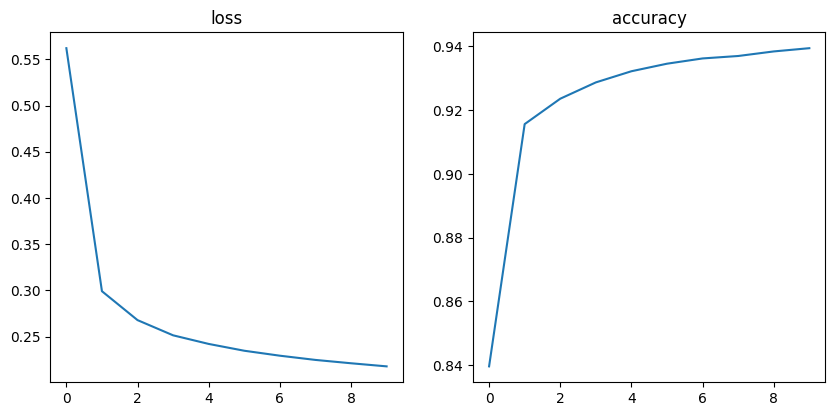

In [17]:
plot_history(history)

##### sequential model 의 단점

In [18]:
inputs = keras.Input(shape=(784,))
x_1 = layers.Dense(64, activation = "relu")(inputs)
x_2 = layers.Dense(64, activation="relu")(inputs)
outputs  = layers.concatenate([x_1,x_2])
ex_model = keras.Model(inputs=inputs, outputs=outputs, name="downside_of_sequential_model")

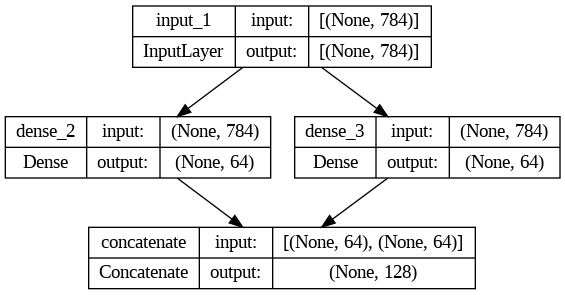

In [19]:
keras.utils.plot_model(ex_model, "mnist_model.png", show_shapes=True)

##### functional API

In [20]:
inputs = keras.Input(shape=(784,))
x_1 = layers.Dense(64, activation = "relu")(inputs)
x_2 = layers.Dense(64, activation="relu")(x_1)
outputs  = layers.Dense(10, activation="softmax")(x_2)

In [21]:
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist")

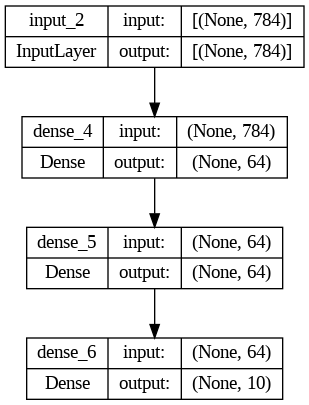

In [22]:
keras.utils.plot_model(model, "mnist_model.png", show_shapes=True)

In [23]:
model.compile(
    loss=keras.losses.CategoricalCrossentropy(),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

In [24]:
history = model.fit(x_train, y_train,  batch_size=64, epochs=7, validation_split=0.2)

Epoch 1/7
750/750 [==============================] - 5s 5ms/step - loss: 0.3492 - accuracy: 0.9007 - val_loss: 0.1805 - val_accuracy: 0.9478
Epoch 2/7
750/750 [==============================] - 3s 4ms/step - loss: 0.1593 - accuracy: 0.9529 - val_loss: 0.1420 - val_accuracy: 0.9584
Epoch 3/7
750/750 [==============================] - 2s 3ms/step - loss: 0.1152 - accuracy: 0.9657 - val_loss: 0.1316 - val_accuracy: 0.9612
Epoch 4/7
750/750 [==============================] - 2s 3ms/step - loss: 0.0927 - accuracy: 0.9719 - val_loss: 0.1092 - val_accuracy: 0.9678
Epoch 5/7
750/750 [==============================] - 3s 4ms/step - loss: 0.0775 - accuracy: 0.9762 - val_loss: 0.1075 - val_accuracy: 0.9711
Epoch 6/7
750/750 [==============================] - 3s 4ms/step - loss: 0.0667 - accuracy: 0.9797 - val_loss: 0.1056 - val_accuracy: 0.9689
Epoch 7/7
750/750 [==============================] - 2s 3ms/step - loss: 0.0594 - accuracy: 0.9812 - val_loss: 0.1003 - val_accuracy: 0.9722


In [25]:
history.history

{'loss': [0.3491780459880829,
  0.1593405306339264,
  0.11516428738832474,
  0.09270941466093063,
  0.07745042443275452,
  0.06672941148281097,
  0.059366557747125626],
 'accuracy': [0.9007083177566528,
  0.9528958201408386,
  0.9657291769981384,
  0.9718541502952576,
  0.9762083292007446,
  0.979729175567627,
  0.9812291860580444],
 'val_loss': [0.18045754730701447,
  0.14201228320598602,
  0.1316370815038681,
  0.10923628509044647,
  0.10746046900749207,
  0.10555938631296158,
  0.10026705265045166],
 'val_accuracy': [0.9478333592414856,
  0.9584166407585144,
  0.9611666798591614,
  0.9678333401679993,
  0.9710833430290222,
  0.968916654586792,
  0.9722499847412109]}

In [26]:
test_loss, test_acc = history.model.evaluate(x_test,y_test, verbose=2)

313/313 - 0s - loss: 0.0950 - accuracy: 0.9725 - 443ms/epoch - 1ms/step


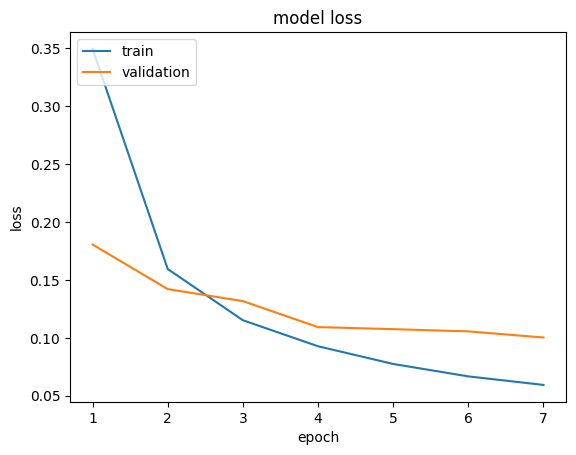

In [27]:
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

###### Hyper parameter (예시)

1. activation_list : ["sigmoid", "relu", "softmax", "tanh"]
2. loss_list : ["sparse_categorical_crossentropy", "categorical_crossentropy", "binary_crossentropy"]
3. optimizer_list : ["sgd", "adam", "rmsprop", "adagrad"]
4. weight initialize : [tf.keras.initializers.RandomNormal(),
 tf.keras.initializers.RandomUniform(), tf.keras.initializers.he_normal(), tf.keras.initializers.he_uniform(), tf.keras.initializers.GlorotUniform(), tf.keras.initializers.GlorotNormal()]

###### Regulation
1. drop out (새로운 layer 추가 )
 > dropout_rate = 0.3  <br/>
 > model.add(tf.keras.layers.Dropout(dropout_rate))
2. regularizer (이미 있는 layer의 parameter로 삽입)
 > rate = 1e-3 <br/>
 > L1 : regularizer = tf.keras.regularizers.l1(rate)<br/>
 > L2 : regularizer = tf.keras.regularizers.l2(rate)<br/>
 > tf.keras.layers.Dense(256, input_dim=784, activation="sigmoid",  kernel_initializer=initializer_list[0])

 [keras 공식 가이드](https://www.tensorflow.org/guide/keras/train_and_evaluate?hl=ko)

 [callback](https://wikidocs.net/80783)

In [ ]:
#모델 저장
# model.save("path_to_my_model")
# del model
# model = keras.models.load_model("path_to_my_model")

##### CNN

In [28]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [29]:
#3d로 만들어주기!
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

# 픽셀 값을 0~1 사이로 정규화합니다.
x_train, x_test = x_train / 255.0, x_test / 255.0


In [30]:
input_layer = keras.Input(shape=(28, 28, 1), name="img")
conv1 = layers.Conv2D(6, (5,5), activation="relu")(input_layer)
maxpool1 = layers.MaxPooling2D(2)(conv1)
conv2 = layers.Conv2D(16, (5,5), activation="relu")(maxpool1)
maxpool2 = layers.MaxPooling2D(2)(conv2)

flatten = layers.Flatten()(maxpool2)

dense1 = layers.Dense(120, activation='relu')(flatten)
dense2 = layers.Dense(84, activation='relu')(flatten)
output_layer = layers.Dense(10, activation='softmax')(dense2)

In [31]:
model = keras.Model(inputs=input_layer, outputs=output_layer)


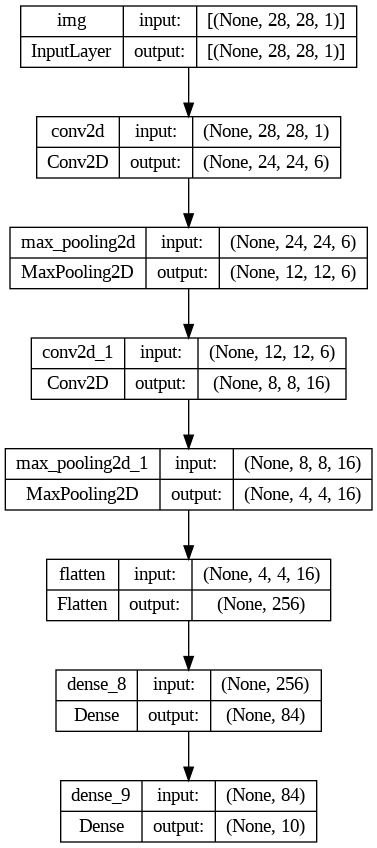

In [32]:
keras.utils.plot_model(model, "mnist_model.png", show_shapes=True)

In [33]:
model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#sparse categorical loss 사용 시 y 값을 categorical로 바꿔줄 필요가 없음!

In [34]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1909 - accuracy: 0.9416
Epoch 2/5
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0687 - accuracy: 0.9788
Epoch 3/5
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0507 - accuracy: 0.9845
Epoch 4/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0421 - accuracy: 0.9873
Epoch 5/5
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0367 - accuracy: 0.9888


In [35]:
test_loss, test_acc = model.evaluate(x_test,y_test, verbose=2)

# callbacks.EarlyStopping 기법을 사용할 수도 있음

313/313 - 2s - loss: 0.0361 - accuracy: 0.9898 - 2s/epoch - 5ms/step


### 과제!!!
아래 데이터를 가지고 test 정확도가 85%를 넘는 모델 만들기

In [36]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


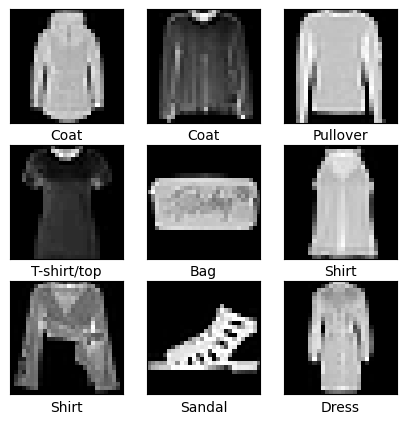

In [37]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(777)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker','Bag','Ankle boot']
sample_size = 9
random_idx = np.random.randint(60000, size=sample_size)

plt.figure(figsize=(5,5))
for i, idx in enumerate(random_idx):
  plt.subplot(3,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[idx], cmap='gray')
  plt.xlabel(class_names[train_labels[idx]])
plt.show()